### Prática da aula de histogramas, submetam o jupyter notebook com o código da atividade.

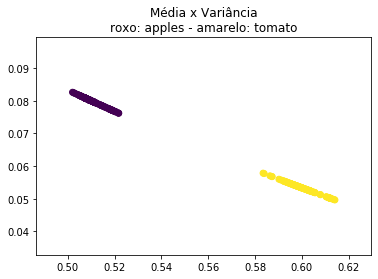

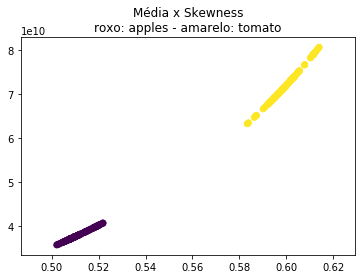

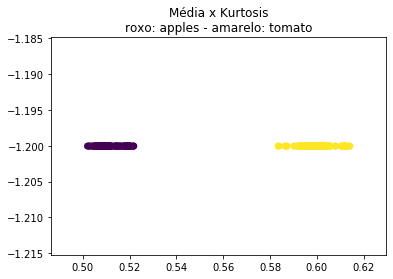

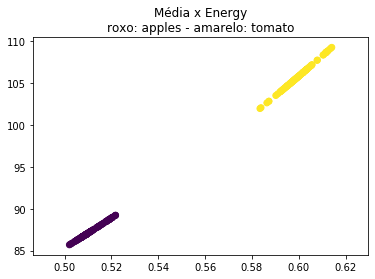

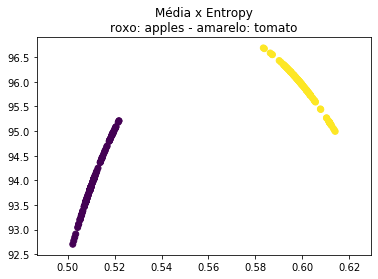

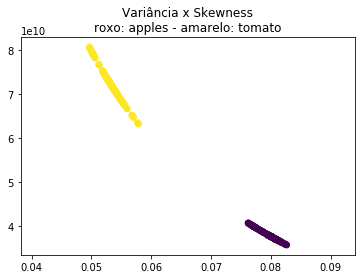

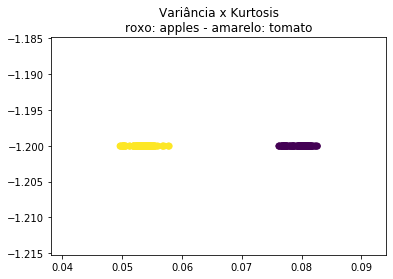

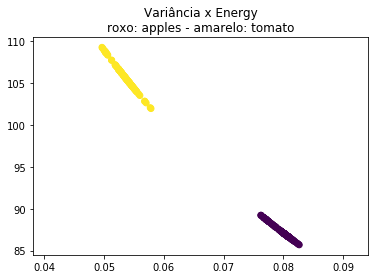

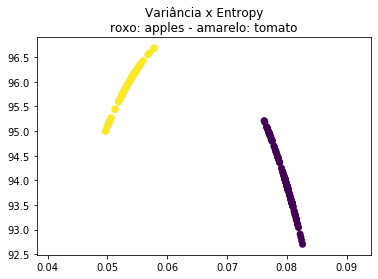

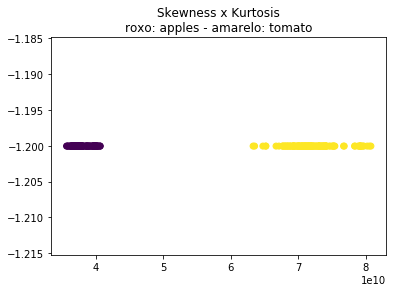

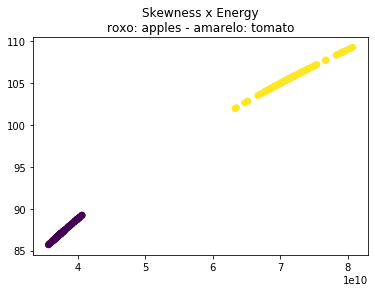

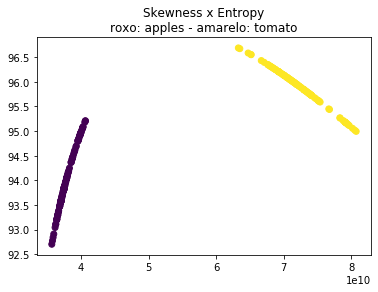

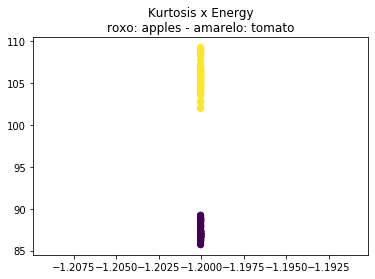

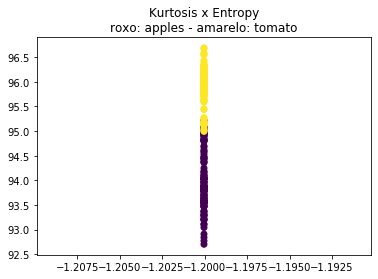

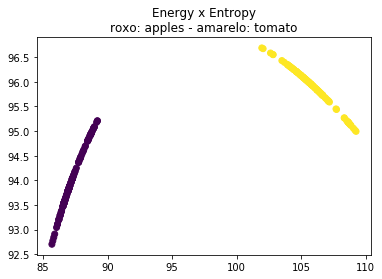

In [1]:
import numpy as np
from skimage.io import imread,imsave, imshow
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.exposure import histogram
from skimage.exposure import equalize_hist
from scipy.stats import kurtosis
import math
import glob as g
from skimage.color import rgb2gray

def energy_hist(hist):
    soma = 0
    for i in hist:
        soma += i*i
    return soma
        
def entropy_hist(hist):
    soma = 0
    for i in hist:
        if(i == 0):
            continue
        soma += (i*(math.log2(i)))
    return soma*-1

def skew(hist):
    soma = 0
    for i in range(len(hist)):
        soma += ((i - hist.mean())**3)*hist[i]
    dp = hist.std()**3
    return ((1/dp)*soma)

def descritor_histograma(imagem):
    hist = histogram(imagem,nbins=256)
    features = []
    features.append(hist[1].mean())
    features.append(hist[1].var())
    features.append(skew(hist[1]))
    features.append(kurtosis(hist[1]))
    features.append(energy_hist(hist[1]))
    features.append(entropy_hist(hist[1]))
    
    return features
    
apples = g.glob('fruit-base/apple/*')
tomatos = g.glob('fruit-base/tomato/*')

features_apple = []
features_tomato = []

for i in apples:
    imagem = imread(i)
    img = rgb2gray(imagem)
    features = descritor_histograma(img)
    features_apple.append(features)
    
for i in tomatos:
    imagem = imread(i)
    img = rgb2gray(imagem)
    features = descritor_histograma(img)
    features_tomato.append(features)
    
listaMedia = []
listaVar = []
listaSkew = []
listaKurtosis = []
listaEnergy = []
listaEntropy = []

labels = []

for i in features_apple:
    listaMedia.append(i[0])
    listaVar.append(i[1])
    listaSkew.append(i[2])
    listaKurtosis.append(i[3])
    listaEnergy.append(i[4])
    listaEntropy.append(i[5])
    labels.append(0)
    
for i in features_tomato:
    listaMedia.append(i[0])
    listaVar.append(i[1])
    listaSkew.append(i[2])
    listaKurtosis.append(i[3])
    listaEnergy.append(i[4])
    listaEntropy.append(i[5])
    labels.append(1)

tudo = []
nomes = ['Média', 'Variância', 'Skewness', 'Kurtosis', 'Energy', 'Entropy']
tudo.append(listaMedia)
tudo.append(listaVar)
tudo.append(listaSkew)
tudo.append(listaKurtosis)
tudo.append(listaEnergy)
tudo.append(listaEntropy)


for i in range(len(tudo)):
    for j in range(i+1,len(tudo)):
        plt.figure()
        plt.title(nomes[i] + " x " + nomes[j] + "\nroxo: apples - amarelo: tomato")
        plt.scatter(tudo[i], tudo[j], c=labels)
